In [10]:
path ="/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/coco128/annotations/instances_train2017.json"
import json
json_file = json.load(open(path))
for i in json_file:
    print(i)
print(type(json_file['type']))
print(json_file['images'])
print(json_file['type'])

info
images
licenses
type
annotations
categories
<class 'str'>
[{'date_captured': '2021', 'file_name': '000000000001.jpg', 'id': 1, 'height': 478, 'width': 640}, {'date_captured': '2021', 'file_name': '000000000002.jpg', 'id': 2, 'height': 500, 'width': 381}, {'date_captured': '2021', 'file_name': '000000000003.jpg', 'id': 3, 'height': 488, 'width': 640}, {'date_captured': '2021', 'file_name': '000000000004.jpg', 'id': 4, 'height': 640, 'width': 480}, {'date_captured': '2021', 'file_name': '000000000005.jpg', 'id': 5, 'height': 426, 'width': 640}, {'date_captured': '2021', 'file_name': '000000000006.jpg', 'id': 6, 'height': 640, 'width': 427}, {'date_captured': '2021', 'file_name': '000000000007.jpg', 'id': 7, 'height': 640, 'width': 565}, {'date_captured': '2021', 'file_name': '000000000008.jpg', 'id': 8, 'height': 426, 'width': 640}, {'date_captured': '2021', 'file_name': '000000000009.jpg', 'id': 9, 'height': 375, 'width': 500}, {'date_captured': '2021', 'file_name': '000000000010.j

In [5]:
import os
import glob
root_path = "/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/labels"
train_path = os.path.join(root_path, 'train')
print(train_path)
train_txt = glob.glob(os.path.join(train_path, "*.txt"))
print(len(train_txt))
train_txt = set(train_txt)
print(len(train_txt))



/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/labels/train
1142
1142


In [56]:
import cv2
import os
import glob
root_path = "/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/labels"
train_path = os.path.join(root_path, 'val')
print("val path: ",train_path)
train_txt = glob.glob(os.path.join(train_path, "*.txt"))
print(len(train_txt))
sum = 0
annotation_path = '/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/car_val_annotation.json'
anno = {}
id = 1
image_id = 1
anno["info"] = {
    "year": 2021,
    "version": "1.0",
    "description": "For car object detection",
    "date_created": "12/06/2023",
}
anno['type'] = "instances"
anno["licenses"] =  [
      {
         "id": 1,
         "name": "GNU General Public License v3.0",
         "url": ""
      }
   ]
anno['categories'] = []
anno["annotations"] = []
anno["images"] = []




train_txt = sorted(train_txt)
# print(train_txt[1])
for txt in train_txt[:]:
   with open(txt, 'r') as t:
      list_bbox = t.readlines()
   print("len list box: ", len(list_bbox))
   sum += len(list_bbox)
   for line in list_bbox:
      bbox = line.split(" ")   # bbox [id, x_center, y_center, width, height]
      if (bbox[0] != '1' and bbox[0]!= '4'):
         check = True
         break
   if(check == True): 
      base_name = os.path.basename(txt)
      image_filename = txt.replace("labels", "images")

      end_file = ["jpg", "png", "jpeg"]
      for end in end_file:
         image_path = image_filename.replace('txt',end)
         if(os.path.isfile(image_path)):
            break
      image_basename = os.path.basename(image_path)
      image = cv2.imread(image_path)
      width = image.shape[1]
      height = image.shape[0]
      # print ("width: ", width)
      # print ("height: ", height)
      image_info = {
         "date_captured": "12/6/2023",
         "file_name": image_basename,
         "id":image_id,
         "height": height,
         "width": width
      }
      anno["images"].append(image_info)
      catego = {
         "id":image_id,
         "name": str(image_id-1),
         "supercategory": str(image_id-1)
      }
      anno['categories'].append(catego)

      
      # print("base name: ", image_basename)
      
      
      # id += 1
      image_id += 1
   print(width )
   if(check == True): 
      for line in list_bbox:
         bbox = line.split(" ")   # bbox [id, x_center, y_center, width, height]
         if (bbox[0] != '1' and bbox[0]!= '4'):
            bbox1 = width*float(bbox[1])
            bbox3 = width*float(bbox[3])
            bbox2 = height*float(bbox[2])
            bbox4 = height*float(bbox[4])
            annotations = {

            "segmentation": [],
            "area": bbox3*bbox4,
            "iscrowd": 0,
            "image_id" :image_id -1,
            "bbox":[bbox1, bbox2, bbox3, bbox4],
            "category_id": 1,
            "id": id,
            }
            anno['annotations'].append(annotations)
            id+=1
            
   # image_id +=1
print(type(anno))
anno = json.dumps(anno)
print(type(anno))
with open(annotation_path, 'w') as g:
   # anno = json.dumps(anno)
   g.write(anno)
print("sum: ", sum)


val path:  /mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/labels/val
117
len list box:  2
720
len list box:  1
720
len list box:  4
1280
len list box:  1
720
len list box:  3
1280
len list box:  2
1280
len list box:  2
720
len list box:  2
720
len list box:  2
720
len list box:  2
720
len list box:  3
720
len list box:  3
720
len list box:  3
720
len list box:  2
720
len list box:  5
720
len list box:  4
720
len list box:  5
720
len list box:  5
720
len list box:  4
720
len list box:  1
720
len list box:  1
720
len list box:  1
720
len list box:  4
720
len list box:  3
720
len list box:  3
720
len list box:  4
720
len list box:  2
720
len list box:  2
720
len list box:  1
720
len list box:  3
720
len list box:  2
1280
len list box:  8
720
len list box:  4
1280
len list box:  6
720
len list box:  3
1280
len list box:  5
1280
len list box:  2
1280
len list box:  3
1280
len list box:  4
1280
len list box:  3
1280
len list box:  7
1280
len list box:  5
1280
len list box:  5

In [42]:
fer = "/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/labels/train/img1034.txt"
with open(fer, "r") as grle:
    a = grle.readlines()
print(((a[0]).split(" ")[0]) == '0')
# print(((a[0]).split(" ")[1]))

False


(720, 1280, 3)


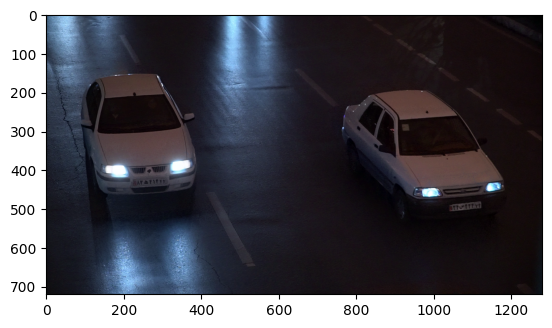

[236, 312, 157, 155]


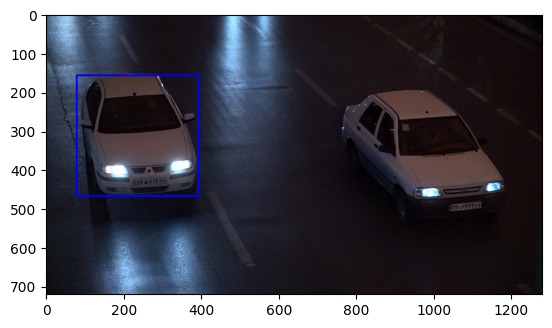

In [39]:
import matplotlib.pyplot as plt
# bbox = [0.47115384615384615, 0.5841346153846154, 0.8497596153846154, 0.7211538461538461]
bbox = [0.18466666666666667, 0.4336492890995261, 0.24666666666666667, 0.4312796208530806]
img = cv2.imread("/mnt/nvme0n1/trinhchien/Vincom/YOLOX/datasets/dataset-vehicles/images/train/702.png")
size = img.shape
print(size)
plt.imshow(img)
plt.show()
bbox[0] = int(bbox[0] * 1280)
bbox[2] = int(bbox[2] * 1280/2)
bbox[1] = int(bbox[1] * 720)
bbox[3] = int(bbox[3] * 720/2)

print(bbox)
# img1 = img[bbox[0]:bbox[0]+bbox[2], bbox[1]:bbox[1]+bbox[3]]
# plt.imshow(img1)
# plt.show()
# img2 = img[]
# 0 0.6993055555555556 0.23203125 0.30972222222222223 0.2671875
# 0 0.8819444444444444 0.02890625 0.19166666666666668 0.0578125
start_point = (bbox[0] - bbox[2], bbox[1] - bbox[3])
end_point = (bbox[0] + bbox[2], bbox[1] + bbox[3])
# end_point = (bbox[0]+2, bbox[1]+2)
# print(start_point)
# print(end_point)
image = cv2.rectangle(img, start_point, end_point,color = (0,0,255), thickness = 3)
plt.imshow(image)
plt.show()
# 0 0.18466666666666667 0.4336492890995261 0.24666666666666667 0.4312796208530806
# 0 0.7646666666666667 0.5059241706161137 0.34 0.476303317535545
